In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [12]:
df=pd.read_csv(r"C:\Users\bhoop\OneDrive\Documents\Desktop\Data\car_evaluation.csv")
df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [13]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [14]:
df.describe()

,vhigh,vhigh.1,2,2.1,small,low,unacc
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [15]:
df.shape

(1727, 7)

In [16]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [23]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
for col in col_names:
 print(df[col].value_counts())

high     432
med      432
low      432
vhigh    431
Name: buying, dtype: int64
high     432
med      432
low      432
vhigh    431
Name: maint, dtype: int64
3        432
4        432
5more    432
2        431
Name: doors, dtype: int64
4       576
more    576
2       575
Name: persons, dtype: int64
med      576
big      576
small    575
Name: lug_boot, dtype: int64
med     576
high    576
low     575
Name: safety, dtype: int64
unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [19]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [25]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [26]:
X = df.drop(['class'], axis=1)

y = df['class']

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [32]:
X_train.shape


(1157, 6)

In [33]:
X_test.shape

(570, 6)

In [34]:
data_types = X_train.dtypes


In [35]:
data_types

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [36]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
83,vhigh,vhigh,5more,2,med,low
48,vhigh,vhigh,3,more,med,med
468,high,vhigh,3,4,small,med
155,vhigh,high,3,more,med,low
1043,med,high,4,more,small,low


In [37]:
X_train = X_train.apply(LabelEncoder().fit_transform)
X_test = X_test.apply(LabelEncoder().fit_transform)

In [38]:
X_train.head()


,buying,maint,doors,persons,lug_boot,safety
83,3,3,3,0,1,1
48,3,3,1,2,1,2
468,0,3,1,1,2,2
155,3,0,1,2,1,1
1043,2,0,2,2,2,1


In [39]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.feature_selection import RFE

ModuleNotFoundError: No module named 'xgboost'

In [48]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.feature_selection import RFE

In [49]:
def score(model, title = "Default"):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
#     print(confusion_matrix(y_test, preds))
    accuracy = round(accuracy_score(y_test, preds), 5)
    print('Accuracy for', title, ':', accuracy, '\n')

In [50]:
lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
score(lg, "Logistic Regression")

Accuracy for Logistic Regression : 0.69825 



In [51]:
ada_boost = AdaBoostClassifier(n_estimators=1000, random_state=0)
ada_boost.fit(X_train, y_train)
ada_boost_predictions = ada_boost.predict(X_test)
accuracy = accuracy_score(y_test, ada_boost_predictions)
print("AdaBoostClassifier Accuracy:", accuracy)

AdaBoostClassifier Accuracy: 0.7719298245614035


In [52]:
# RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
random_forest.fit(X_train, y_train)
random_forest_predictions = random_forest.predict(X_test)
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)
print("RandomForestClassifier Accuracy:", random_forest_accuracy)

RandomForestClassifier Accuracy: 0.9543859649122807


In [53]:
# Gaussian Naive Bayes
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train, y_train)
gaussian_nb_predictions = gaussian_nb.predict(X_test)
accuracy = accuracy_score(y_test, gaussian_nb_predictions)
print("GaussianNB Accuracy:", accuracy)

GaussianNB Accuracy: 0.6140350877192983


In [54]:
# KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)  # Example: 5 neighbors
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)
accuracy = accuracy_score(y_test, knn_predictions)
print("KNeighborsClassifier Accuracy:", accuracy)

KNeighborsClassifier Accuracy: 0.8929824561403509


In [55]:
# DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree.fit(X_train, y_train)
decision_tree_predictions = decision_tree.predict(X_test)
accuracy = accuracy_score(y_test, decision_tree_predictions)
print("DecisionTreeClassifier Accuracy:", accuracy)

DecisionTreeClassifier Accuracy: 0.9754385964912281


[Text(0.5413851351351351, 0.9642857142857143, 'X[3] <= 0.5\ngini = 0.457\nsamples = 1157\nvalue = [257, 51, 810, 39]'),
 Text(0.5278716216216216, 0.8928571428571429, 'gini = 0.0\nsamples = 377\nvalue = [0, 0, 377, 0]'),
 Text(0.5548986486486487, 0.8928571428571429, 'X[5] <= 0.5\ngini = 0.576\nsamples = 780\nvalue = [257, 51, 433, 39]'),
 Text(0.27407094594594594, 0.8214285714285714, 'X[0] <= 2.5\ngini = 0.626\nsamples = 256\nvalue = [138, 19, 60, 39]'),
 Text(0.15625, 0.75, 'X[0] <= 0.5\ngini = 0.615\nsamples = 189\nvalue = [106, 19, 25, 39]'),
 Text(0.05405405405405406, 0.6785714285714286, 'X[1] <= 2.5\ngini = 0.404\nsamples = 64\nvalue = [46, 0, 18, 0]'),
 Text(0.04054054054054054, 0.6071428571428571, 'X[2] <= 0.5\ngini = 0.115\nsamples = 49\nvalue = [46, 0, 3, 0]'),
 Text(0.02702702702702703, 0.5357142857142857, 'X[4] <= 1.5\ngini = 0.32\nsamples = 15\nvalue = [12, 0, 3, 0]'),
 Text(0.013513513513513514, 0.4642857142857143, 'gini = 0.0\nsamples = 9\nvalue = [9, 0, 0, 0]'),
 Text(0.0

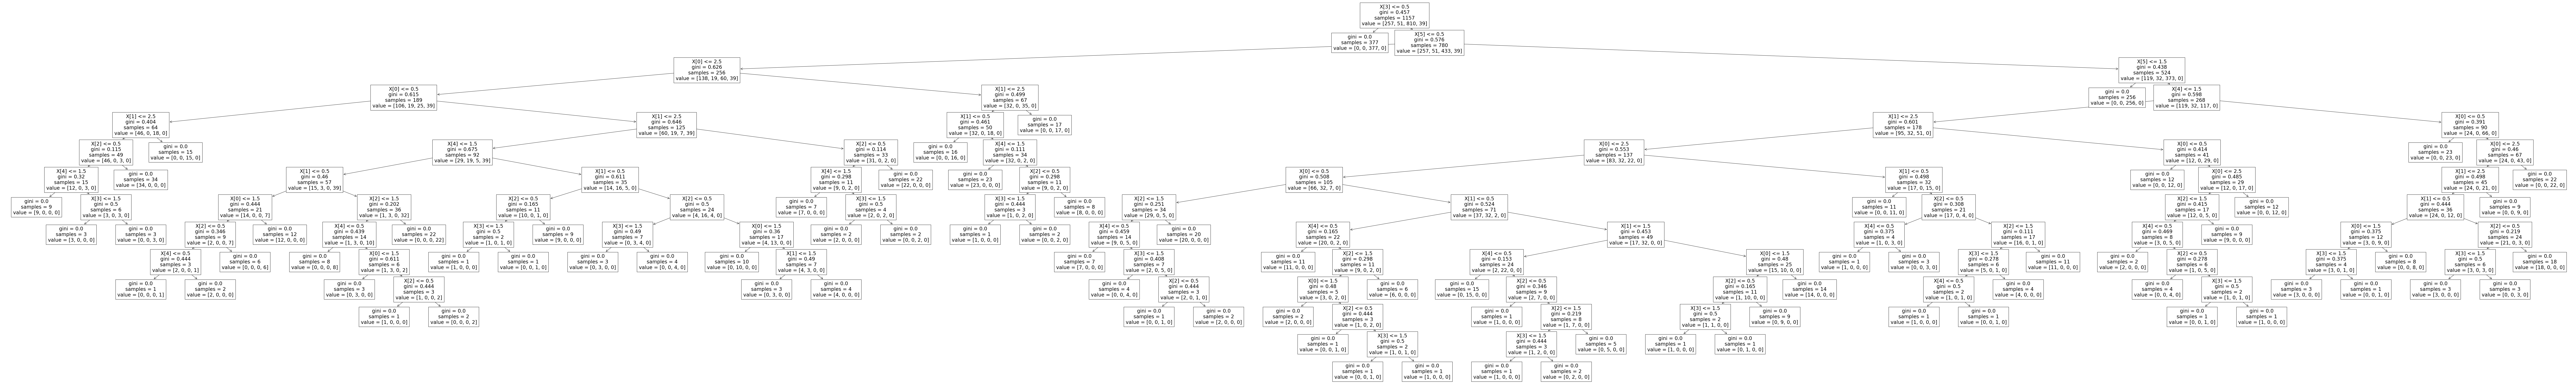

In [57]:
plt.figure(figsize=(200,30))

from sklearn import tree
#change the model name
tree.plot_tree(decision_tree)

In [58]:
# DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=0)
decision_tree.fit(X_train, y_train)
decision_tree_predictions = decision_tree.predict(X_test)
accuracy = accuracy_score(y_test, decision_tree_predictions)
print("DecisionTreeClassifier Accuracy:", accuracy)


DecisionTreeClassifier Accuracy: 0.9596491228070175


In [59]:
# DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=0)
decision_tree.fit(X_train, y_train)
decision_tree_predictions = decision_tree.predict(X_test)
accuracy = accuracy_score(y_test, decision_tree_predictions)
print("DecisionTreeClassifier Accuracy:", accuracy)

DecisionTreeClassifier Accuracy: 0.9263157894736842


In [61]:
# Create confusion matrix
cm = confusion_matrix(y_test, xgb_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - XGBClassifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

NameError: name 'xgb_predictions' is not defined